<a href="https://colab.research.google.com/github/Mbenrh/30NitesOfCode/blob/main/Copy_of_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classification Metrics # Classification Metrics and Pipelines and GridSearchCV


In this notebook we will explore evaluating 2 different classification models the [data](https://docs.google.com/spreadsheets/d/1ltL_pHd2L8IK_2mpP4qUKonFaQ7NFqcM3ndY91l-360/edit?usp=sharing)  using Sci-kit Learn (AKA sklearn).

Secondly, we will build the best model possible using Sci-kit Learn (AKA sklearn).

## This is a bi-class problem because there are 2 possible classes!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(display='diagram')

In [ ]:
path='/content/drive/MyDrive/datasets/Belt2_A_drugtype_v2_final.csv'
df = pd.read_csv(path)
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [ ]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())

Missing data:
 Age            59
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64


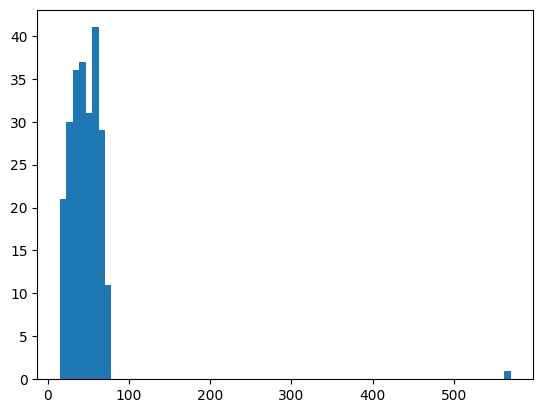

In [ ]:
import matplotlib.pyplot as plt
# creating a histogram
plt.hist(df['Age'],bins = 70)
plt.show()


In [ ]:
# the missing values are numerical and the distribution of the variable is approximately skewed, so we use median imputation
df['Age'].fillna(df['Age'].median(), inplace = True)

In [ ]:
# Looking at" the full dataset in google docs we can notice that the data is ordered by BP, we can simply fill in the missing values using ffill or bfill
df['BP'].ffill(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          296 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           296 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [ ]:
df['Gender'].value_counts()

M         149
F         137
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace(['male','Male'],'M')
df['Gender'] = df['Gender'].replace(['Female','female','Femal','femal'],'F')
df['Gender'].value_counts()

M    154
F    142
Name: Gender, dtype: int64

In [ ]:
df['BP'].value_counts()

High      194
Normal     60
Low        42
Name: BP, dtype: int64

In [ ]:
df['Cholesterol'].value_counts()

HIGH      156
NORMAL    117
norm        9
high        8
NORM        6
Name: Cholesterol, dtype: int64

In [ ]:
df['Cholesterol'] = df['Cholesterol'].replace(['high'],'HIGH')
df['Cholesterol'] = df['Cholesterol'].replace(['NORM','norm'],'NORMAL')
df['Cholesterol'].value_counts()

HIGH      164
NORMAL    132
Name: Cholesterol, dtype: int64

In [ ]:
df['Drug'].value_counts()

drugQ    148
drugZ    148
Name: Drug, dtype: int64

In [ ]:
df['Na_to_K']= df['Na_to_K'].str.strip('_')
df['Na_to_K']=df['Na_to_K'].astype(float)

In [ ]:
df.describe()

,Age,Na_to_K
count,296.000000,296.000000
mean,47.020270,14.709355
std,33.735455,6.364668
min,15.000000,6.269000
25%,36.000000,10.445250
50%,45.000000,12.856000
75%,56.000000,16.732000
max,570.000000,38.247000


In [ ]:
df['Age'].replace({570:57},inplace=True)
df.describe()

,Age,Na_to_K
count,296.000000,296.000000
mean,45.287162,14.709355
std,14.431203,6.364668
min,15.000000,6.269000
25%,36.000000,10.445250
50%,45.000000,12.856000
75%,56.000000,16.732000
max,74.000000,38.247000


<Axes: >

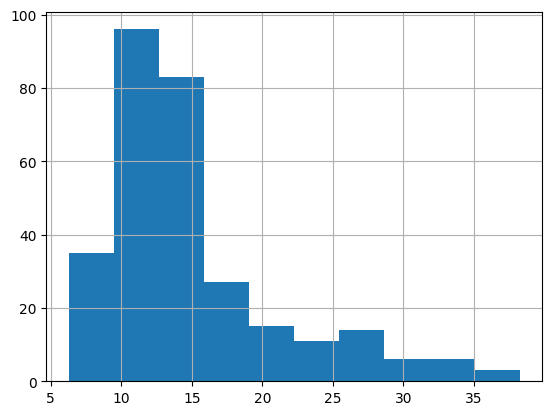

In [ ]:
df['Na_to_K'].hist()

The distribution is skewed to the right, which means that the tail of the distribution is longer on the right side. This also means that the mean is greater than the mode.



<Axes: xlabel='Gender', ylabel='Age'>

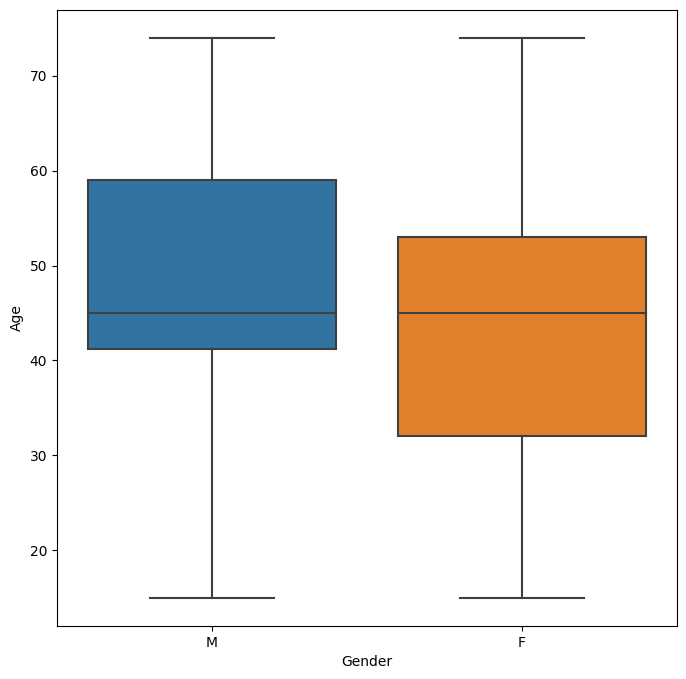

In [ ]:
import seaborn as sns
dims = (8, 8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(data=df, x='Gender', y='Age',ax=ax)

Females are younger than Males in this data.

In [ ]:
target = 'Drug'
X = df.drop(columns=target).copy()
y = df[target].copy()
X.head()

NameError: name 'df' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
df['BP'].replace({'Low':0, 'Normal':1, 'High':2}, inplace = True) # It is a numinal column with order
df['Cholesterol'].replace({'NORMAL':0, 'HIGH':1}, inplace = True) # It is a numinal column with order

In [ ]:
cat_feature = make_column_selector(dtype_include='object')   # Creating a categorical data selector
num_feature = make_column_selector(dtype_include='number')   # Creating a numeric data selector

# Instantiating the Transformers

impute_cat = SimpleImputer(strategy='most_frequent') #better to keep the ffil but for simplicity reasons I will keep this one
impute_num = SimpleImputer(strategy='median') # I'll keep it as mentioned before
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')   # It is a numinal column with no order to it => So I used the One-hot encoding
scaler = StandardScaler()

# Making pipelines for each category

pip_cat = make_pipeline(impute_cat, ohe_encoder)
pip_num = make_pipeline(impute_num, scaler)

# Defining a tuple for each pathway

categorical_tup = ('Categorical', pip_cat, cat_feature)
numerical_tup = ('Numerical', pip_num, num_feature)

# Instantiating the ColumnTransformer

col_transformer = ColumnTransformer([numerical_tup, categorical_tup], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd233d0>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd23580>)],
                  verbose_feature_names_out=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
DTC = DecisionTreeClassifier()

DTC_pipe = make_pipeline(col_transformer, DTC)

DTC_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd233d0>),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd23580>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(col_transformer, knn)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd233d0>),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd23580>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred_train_DTC = DTC_pipe.predict(X_train)
y_pred_test_DTC = DTC_pipe.predict(X_test)
y_pred_train_knn = knn_pipe.predict(X_train)
y_pred_test_knn = knn_pipe.predict(X_test)

In [ ]:
print('DTC Train Metrics')
print(classification_report(y_train, y_pred_train_DTC))
print('\nDTC Test Metrics')
print(classification_report(y_test, y_pred_test_DTC))

DTC Train Metrics
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       114
       drugZ       1.00      1.00      1.00       108

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222


DTC Test Metrics
              precision    recall  f1-score   support

       drugQ       0.68      0.62      0.65        34
       drugZ       0.70      0.75      0.72        40

    accuracy                           0.69        74
   macro avg       0.69      0.68      0.68        74
weighted avg       0.69      0.69      0.69        74



In [ ]:
print('knn Train Metrics')
print(classification_report(y_train, y_pred_train_knn))
print('\nknn Test Metrics')
print(classification_report(y_test, y_pred_test_knn))

knn Train Metrics
              precision    recall  f1-score   support

       drugQ       0.97      1.00      0.98       114
       drugZ       1.00      0.96      0.98       108

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222


knn Test Metrics
              precision    recall  f1-score   support

       drugQ       0.58      0.62      0.60        34
       drugZ       0.66      0.62      0.64        40

    accuracy                           0.62        74
   macro avg       0.62      0.62      0.62        74
weighted avg       0.62      0.62      0.62        74



In [ ]:
DTC_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7aa431622a10>),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
      

In [ ]:
DTC_params = {'decisiontreeclassifier__max_depth' : range(1,50),'decisiontreeclassifier__criterion':['gini', 'entropy', 'log_loss']}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
DTC_grid = GridSearchCV(DTC_pipe, DTC_params)
DTC_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd233d0>),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImpu...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd23580>)],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': range(1, 50)})

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7aa431622a10>),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
      

In [ ]:
knn_params = {'kneighborsclassifier__n_neighbors' : range(1,20),
          'kneighborsclassifier__weights' : ['uniform', 'distance'],
          'kneighborsclassifier__p' : [2, 3, 4]}

In [ ]:
knn_grid = GridSearchCV(knn_pipe, knn_params)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd233d0>),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImpu...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fc58bd23580>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__p': [2, 3, 4],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [ ]:
DTC_grid.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 2}

In [ ]:
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
best_DTC = DTC_grid.best_estimator_
best_knn = knn_grid.best_estimator_

In [ ]:
y_pred_train_DTC = best_DTC.predict(X_train)
y_pred_test_DTC = best_DTC.predict(X_test)
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

In [ ]:
print('DTC Train Metrics')
print(classification_report(y_train, y_pred_train_DTC))
print('\nDTC Test Metrics')
print(classification_report(y_test, y_pred_test_DTC))

DTC Train Metrics
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       114
       drugZ       1.00      1.00      1.00       108

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222


DTC Test Metrics
              precision    recall  f1-score   support

       drugQ       0.68      0.62      0.65        34
       drugZ       0.70      0.75      0.72        40

    accuracy                           0.69        74
   macro avg       0.69      0.68      0.68        74
weighted avg       0.69      0.69      0.69        74



In [ ]:
print('knn Train Metrics')
print(classification_report(y_train, y_pred_train_knn))
print('\nknn Test Metrics')
print(classification_report(y_test, y_pred_test_knn))

knn Train Metrics
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       114
       drugZ       1.00      1.00      1.00       108

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222


knn Test Metrics
              precision    recall  f1-score   support

       drugQ       0.64      0.62      0.63        34
       drugZ       0.68      0.70      0.69        40

    accuracy                           0.66        74
   macro avg       0.66      0.66      0.66        74
weighted avg       0.66      0.66      0.66        74



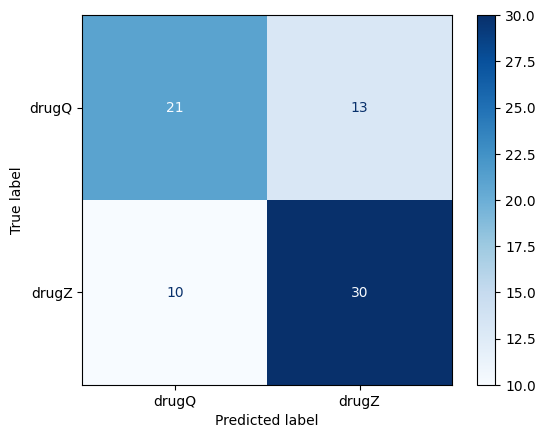

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_DTC, X_test, y_test, cmap='Blues')

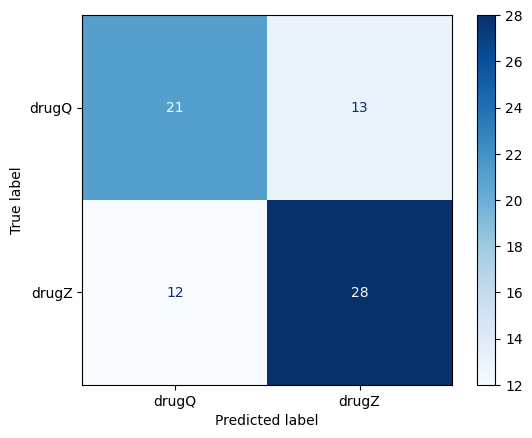

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap='Blues')

DT Classifier is performing way better than KNN, we can see that precision, recall and f1-score have increased for the DTC and we can see it in the confusion matrix for the two classes drugQ and drugZ.

